### Notebook de mi tesis de licenciatura:
#### 'La Energia Potencial de Boyancia contenida en un perfil vertical de densidad'
López García J. Felix, ING. Geofísico, IPN-ESIA Ticoman.

Asesor: Ramos Musalem Ana Karina. PhD. physical oceanographer, ICAyCC, UNAM.

CDMX-2023

RESUMEN
    
La mezcla turbulenta en la capa límite superior del océano, el intercambio de momento, calor y masa induce a la presencia de mezcla vertical en la columna de agua y a la formación de una capa de mezcla en la parte superficial del océano. Esta capa de mezcla tiene cabida dentro de muchos procesos dinámicos, así como en el acoplamiento con procesos atmosféricos, procesos bioquímicos y procesos biológicos. Las metodologías desarrolladas con el propósito de obtener la profundidad de la capa de mezcla (MLD) giran entorno a el umbral de alguna propiedad física del agua de mar (densidad o temperatura) a través de un perfil vertical de dicha propiedad; son prácticos para hacer estimaciones, sin embargo, carecen de una motivación física. Debido a lo anterior, se trabajó en el desarrollo de una definición de MLD basado en el cálculo de la energía potencial de boyancia (EPB) contenida en un perfil vertical de densidad. Obteniendo la cantidad de energía necesaria para llevar una parcela de agua desde la superficie hasta una profundidad dada (EPB), a partir de los datos de densidad potencial provenientes de un perfil vertical. Dentro de la MLD la estratificación es nula y no se requiere de algún trabajo (energía) para desplazar a la parcela de agua en esa región, pero una vez que comienza la estratificación (termina la capa de mezcla) hay un incremento abrupto del trabajo (energía) para seguir bajando en profundidad y es ahí donde definimos que se encuentra la MLD.
    
Con bases de datos de mediciones in situ del programa ARGO al interior del GdM, realizamos una comparación cuantitativa con las metodologías de Levitus, Kara y Sprintall, y del modelo HYCOM. 
Encontramos que la EPB está físicamente relacionada con la estratificación en la columna de agua y la cantidad de boyancia dentro de la región de la capa de mezcla. Hay un evidente incremento de trabajo que va de la mano con el comienzo de la estratificación (base de la picnoclina) en la columna de agua, este parámetro analizado es muy sensible acorde a la resolución espacial de los datos.


A partir de bases de datos obtenidos por la pagina de ARGO, descargamos 4 datasets dentro del Golfo de Mexico.

Trabajamos con las siguientes librerias:

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw
import numpy as np
import seaborn as sea
import pandas as pd

Bases de datos:

In [28]:
ds=xr.open_dataset('4901476_prof.nc')
ds1=xr.open_dataset('4901477_prof.nc')
ds2=xr.open_dataset('4902916_prof.nc')
ds3=xr.open_dataset('4903276_prof.nc')

Comprobamos que la cohesion de la base de datos bajo la idea de mostrar un plot de temperatura:

Text(0.5, 1.0, 'Temperature accross the water column')

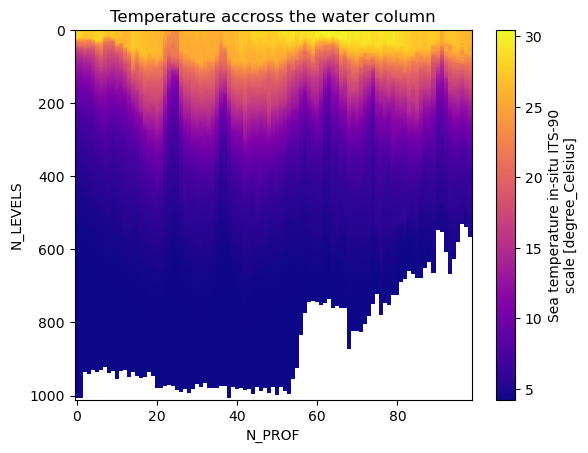

In [29]:
ds3.TEMP_ADJUSTED[1:100].T.plot(cmap=plt.cm.plasma)
plt.gca().invert_yaxis()
plt.title("Temperature accross the water column")

#### Trayectorias descritas por cada flotador

Se muestra un mapa con las ubicaciones y las trayectorias que cada flotador describio en el periodo donde se relizaron mediciones

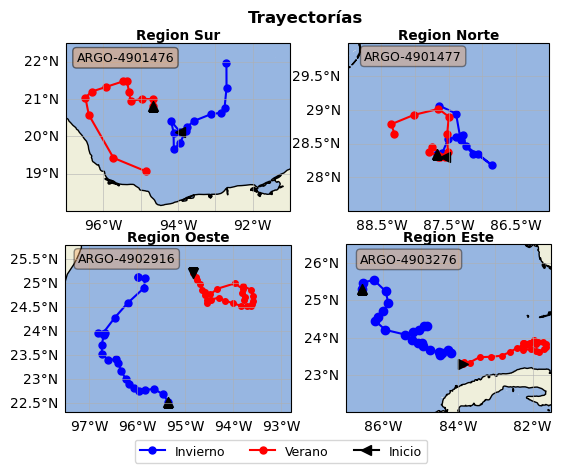

In [30]:
fig = plt.figure()
fig.suptitle('Trayectorías', fontsize=12,y=0.95,fontweight='bold')
ax1 = fig.add_subplot(2,2,1, projection=ccrs.PlateCarree())

ax1.set_extent([-97,-91, 18, 22.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND)#,facecolor='seagreen')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.OCEAN)#,facecolor='skyblue'
ax1.set_title('Region Sur', fontsize=9.8,y=0.97,fontweight ='bold')

#Invierno
plt.plot(ds.LONGITUDE[246:259],ds.LATITUDE[246:259],marker='o',c='blue', markersize=5,label='Invierno') #markersize=5,label='Invierno')
# #Verano
plt.plot(ds.LONGITUDE[227:240],ds.LATITUDE[227:240],marker='o',c='red',markersize=5, label='Verano')
plt.plot(ds.LONGITUDE[227],ds.LATITUDE[227],marker='^',c='k',markersize=7)  #inicio
plt.plot(ds.LONGITUDE[246],ds.LATITUDE[246],marker='<',c='k',markersize=7,label='Inicio') #inicio
ax1.text(-94.1,22.1, 'ARGO-4901476',fontsize=9,
            verticalalignment='center', horizontalalignment='right',
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4)
gl1.top_labels = False
gl1.right_labels = False
# ax1.legend(ncol=3 ,loc = 'upper left' , fontsize=8)

##############
ax2 = fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
ax2.set_extent([-89,-86, 27.5, 30], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)#,facecolor='seagreen')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.OCEAN)#,facecolor='skyblue'
ax2.set_title('Region Norte', fontsize=9.8,y=0.97,fontweight ='bold')

#Invierno
plt.plot(ds1.LONGITUDE[23:36],ds1.LATITUDE[23:36],marker='o',c='blue', markersize=5)
# #Verano
plt.plot(ds1.LONGITUDE[42:54],ds1.LATITUDE[42:54],marker='o',c='red',markersize=5)
#Begin
plt.plot(ds1.LONGITUDE[23],ds1.LATITUDE[23],marker='^',c='k',markersize=7)
plt.plot(ds1.LONGITUDE[42],ds1.LATITUDE[42],marker='<',c='k',markersize=7)
ax2.text(-87.3,29.8, 'ARGO-4901477',fontsize=9,
            verticalalignment='center', horizontalalignment='right',
            bbox=dict(facecolor='sandybrown', alpha=0.4, boxstyle='round'))

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False
# ax2.legend(ncol=3 ,loc = 'upper left' , fontsize=8)

#######

ax3 = fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
ax3.set_extent([-97.5,-92.8, 22.3, 25.8], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND)#,facecolor='seagreen')
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.OCEAN)#,facecolor='skyblue'
ax3.set_title('Region Oeste', fontsize=9.8,y=0.97,fontweight ='bold')

#Invierno
plt.plot(ds2.LONGITUDE[254:278],ds2.LATITUDE[254:278],marker='o',c='blue', markersize=5)
# #Veran
plt.plot(ds2.LONGITUDE[291:319],ds2.LATITUDE[291:319],marker='o',c='red',markersize=4)
#Begin
plt.plot(ds2.LONGITUDE[254],ds2.LATITUDE[254],marker='^',c='k',markersize=7)
plt.plot(ds2.LONGITUDE[291],ds2.LATITUDE[291],marker='v',c='k',markersize=7)
ax3.text(-95.2,25.5, 'ARGO-4902916',fontsize=9,
            verticalalignment='center', horizontalalignment='right',
            bbox=dict(facecolor='sandybrown', alpha=0.4, boxstyle='round'))

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False
#######
ax4 = fig.add_subplot(2,2,4, projection=ccrs.PlateCarree())
ax4.set_extent([-87,-81.5, 22, 26.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND)#,facecolor='seagreen')
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.OCEAN)#,facecolor='skyblue'
ax4.set_title('Region Este', fontsize=9.8,y=0.97,fontweight ='bold')

#Invierno
plt.plot(ds3.LONGITUDE[14:38],ds3.LATITUDE[14:38],marker='o',c='blue', zorder=3)
plt.plot(ds3.LONGITUDE[14:38],ds3.LATITUDE[14:38],'r.',zorder=2, linewidth=0.9)
# #Veran
plt.plot(ds3.LONGITUDE[51:76],ds3.LATITUDE[51:76],marker='o',c='red',markersize=4)
#Begin
plt.plot(ds3.LONGITUDE[14],ds3.LATITUDE[14],marker='^',c='k',markersize=7,zorder=4)
plt.plot(ds3.LONGITUDE[51],ds3.LATITUDE[51],marker='>',c='k',markersize=7)
ax4.text(-84,26.1, 'ARGO-4903276',fontsize=9,
            verticalalignment='center', horizontalalignment='right',
            bbox=dict(facecolor='sandybrown', alpha=0.4, boxstyle='round'))

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4)
gl.top_labels = False
gl.right_labels = False
fig.legend(ncol=3 ,loc = 'lower center' , fontsize=9)

Text(0.5, 0.96, 'Perfiles verticales de densidad\n en diferentes fechas')

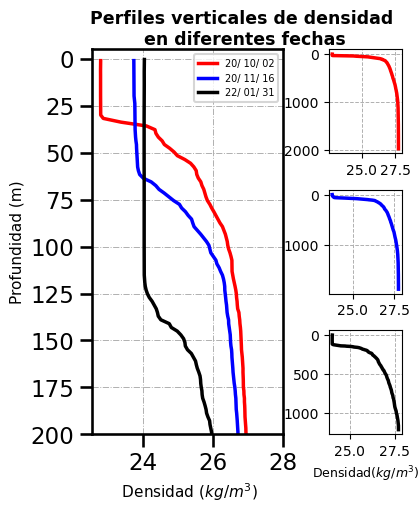

In [50]:
with sea.plotting_context('talk'):
    fig =plt.figure(figsize=(4,5))
    gs = fig.add_gridspec(3, 3,wspace=0.625,hspace=0.35)

    ax=fig.add_subplot(gs[:, :2])
    ax.plot(DP[2,:],D_z[2,:],'r-',linewidth = 2.5, label = ds3.JULD[2].dt.strftime('%y/ %m/ %d').values)
    ax.plot(DP[11,:],D_z[11,:],'b-',linewidth = 2.5 , label = ds3.JULD[11].dt.strftime('%y/ %m/ %d').values)
    ax.plot(DP[100,:],D_z[100,:],'k',linewidth = 2.5,label = ds3.JULD[100].dt.strftime('%y/ %m/ %d').values)
    ax.set_xlabel(r' Densidad ($kg/m^3 $)',fontsize=11)
    ax.set_ylabel(r'Profundidad (m)',fontsize=11)
    # ax.set_title(r'Perfil de Densidad',fontsize =14)
    ax.invert_yaxis()
    ax.set_ylim( 200,-5)
    ax.grid(linestyle='-.',linewidth=0.7)
    ax.legend( loc = 'upper right' , fontsize=7)

ax1 = fig.add_subplot(gs[0:1, 2])
ax1.plot(DP[2,:],D_z[2,:],'r-',linewidth = 2.5, label = ds3.JULD[2].dt.strftime('%y/ %m/ %d').values)
ax1.invert_yaxis()
ax1.grid(linestyle='--',linewidth=0.7)

ax2= fig.add_subplot(gs[1:2, 2])
ax2.plot(DP[11,:],D_z[11,:],'b-',linewidth = 2.5 , label = ds3.JULD[11].dt.strftime('%y/ %m/ %d').values)
ax2.invert_yaxis()
ax2.grid(linestyle='--',linewidth=0.7)

ax3 = fig.add_subplot(gs[2:3, 2])
ax3.plot(DP[100,:],D_z[100,:],'k',linewidth = 2.5,label = ds3.JULD[100].dt.strftime('%y/ %m/ %d').values)
ax3.invert_yaxis()
ax3.set_xlabel(r'Densidad($kg/m^3$)', fontsize=9)
ax3.grid(linestyle='--',linewidth=0.7)

plt.suptitle('Perfiles verticales de densidad\n en diferentes fechas',fontsize =12.5,y=0.96,fontweight='bold')


In [51]:
i=100
lon = ds3.LONGITUDE[i]
lat = ds3.LATITUDE[i]
T = ds3.TEMP_ADJUSTED[i]   # in situ T
P = ds3.PRES_ADJUSTED[i]   # presión
Sp = ds3.PSAL_ADJUSTED[i]  #salinidad práctica
SA = gsw.conversions.SA_from_SP(Sp, P, lon, lat) # SA a partir de salinidad potencial
Tp = gsw.conversions.pt0_from_t(SA, T, P) # temperatura potencial con p_ref=0
CT = gsw.conversions.CT_from_t(SA, T, P) # temperatura conservativa
depth= -1*gsw.z_from_p(P,lat) #profundidad a partir de la presion
###
TEC=gsw.density.alpha(Sp,T,P) #Thermal Expantion Coefficent
    ########################
Dens = gsw.density.sigma0(SA,CT) # densidad potencial referencia 0dbar - 1000

In [52]:
TEC[10].data

array(0.00030551)

In [53]:
SP = Dens[10] + (0.1 * TEC[10])
Dens[10].data , SP.data , Dens[0:40].data

(array(24.04548926),
 array(24.04551981),
 array([24.04903248, 24.04846064, 24.04661494, 24.04407   , 24.04417506,
        24.04452421, 24.04461775, 24.04472857, 24.04511747, 24.04569793,
        24.04548926, 24.04534971, 24.04567942, 24.04487547, 24.04417245,
        24.04449093, 24.04343953, 24.04366669, 24.04294765, 24.04298019,
        24.04194006, 24.04177748, 24.04163175, 24.04176469, 24.04187183,
        24.04172672, 24.04186979, 24.04198703, 24.04184065, 24.04196367,
        24.04178853, 24.04164565, 24.04176118, 24.04162464, 24.04178625,
        24.04296876, 24.04310743, 24.04321151, 24.04303189, 24.04259092]))

In [54]:
depth[14].data

array(17.92451305)

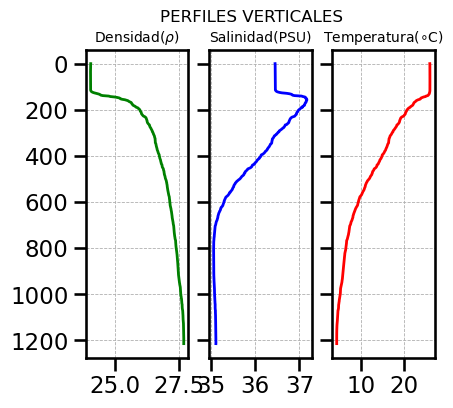

In [56]:
''' Obtenemos los perfiles verticales del flotador ARGO-4903276'''
with sea.plotting_context('talk'):
    fig,axs = plt.subplots(1,3,figsize=(4.5,4),sharey=True)
    fig.suptitle('PERFILES VERTICALES ', fontsize=12) #%ds.JULD[i].dt.strftime('%y/%m/%d').values, fontsize=12)
    # fig.subplots_adjust(hspace=0)

    axs[0].plot(Dens,depth,'g', linewidth=2)
    axs[0].set_title(r'Densidad($\rho$)', fontsize=10)
    axs[0].invert_yaxis()
    axs[0].grid(linestyle='--',linewidth=0.6)

    axs[1].plot(SA,depth,'b', linewidth=2)
    axs[1].set_title('Salinidad(PSU)',fontsize=10)
    axs[1].invert_yaxis()
    axs[1].grid(linestyle='--',linewidth=0.6)

    axs[2].plot(CT,depth,'r', linewidth=2)
    axs[2].set_title(r'Temperatura($\circ$C)',fontsize=10)
    axs[2].invert_yaxis()
    axs[2].grid(linestyle='--',linewidth=0.6)


In [59]:
'''Obtenemos el valor de N^2 o la frecuencia de Brunt-Väisälä
con la librería gsw '''

N2,p_mid=gsw.Nsquared(SA,CT,P)

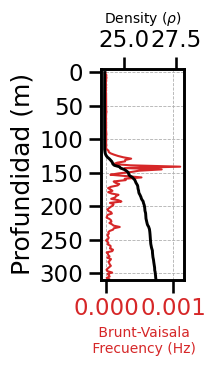

In [65]:
with sea.plotting_context('talk'):
    fig, ax1 = plt.subplots(figsize=(2.5,4))
    # fig.suptitle(' Estabilidad estatica vs Densidad ', fontsize=14)

    color = 'tab:red'
    ax1.set_xlabel(' Brunt-Vaisala\n Frecuency (Hz)', color=color, fontsize=10)
    ax1.set_ylabel('Profundidad (m)')#,fontsize=10)
    ax1.plot(N2,p_mid ,color=color, linewidth = 1.5)
    ax1.tick_params(axis='x' ,labelcolor=color)
    ax1.autoscale(True)

    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'black'
    ax2.set_xlabel(r'Density ($\rho$)', color=color, fontsize=10)  # we already handled the x-label with ax1
    ax2.plot(Dens,depth,color=color,linewidth = 2.1)
    ax2.tick_params(axis='x', labelcolor=color,)
    ax2.invert_yaxis()

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax1.grid(linestyle='--', linewidth=0.6)
    ax1.set_ylim(310,-5)

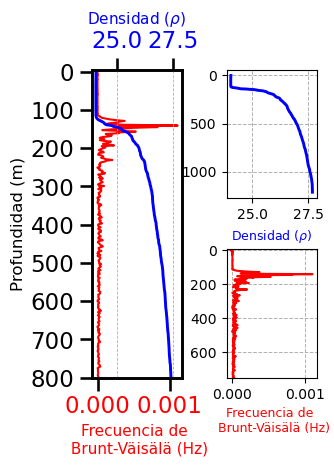

In [67]:
''' Comparacion de un perfil vertical con la frecuencia de Brun-Väisälä'''
with sea.plotting_context('talk'):
    fig =plt.figure(figsize=(2.9,4))
    fig.tight_layout()
    # fig.suptitle(' Estabilidad estatica vs Densidad ', fontsize=12, y=1.02 )

    # gs = gridspec.GridSpec(3, 3,
    #                       wspace=0.5, hspace=0.05)
    gs = fig.add_gridspec(2, 2,wspace=0.5, hspace=0.4)
    ax=fig.add_subplot(gs[:, 0])
    color = 'red'
    ax.set_xlabel('Frecuencia de \n Brunt-Väisälä (Hz)', color=color, fontsize=11)
    ax.set_ylabel('Profundidad (m)',fontsize=12)
    ax.plot(N2,p_mid ,color=color, linewidth = 1.5)
    ax.tick_params(axis='x' ,labelcolor=color)
    ax.autoscale(True)

    ax = ax.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'blue'
    ax.set_xlabel(r'Densidad ($\rho$)', color=color, fontsize=11)  # we already handled the x-label with ax1
    ax.plot(Dens,depth,color=color,linewidth = 2.1)
    ax.tick_params(axis='x', labelcolor=color,)
    ax.invert_yaxis()

     # otherwise the right y-label is slightly clipped
    ax.grid(linestyle='--', linewidth=0.6)
    ax.set_ylim(800,-5)
    
ax1 = fig.add_subplot(gs[1:2, 1])
color1 = 'red'
ax1.plot(N2,p_mid ,color=color1, linewidth = 1.5) # label = ds3.JULD[2].dt.strftime('%y/ %m/ %d').values)
ax1.invert_yaxis()
ax1.set_ylim(750,-5)
ax1.set_xlabel('Frecuencia de \n Brunt-Väisälä (Hz)', color=color1, fontsize=9)
# ax1=fig.tight_layout()
# ax1.set_xlim(22.3,25)
# ax1.get_xaxis().set_visible(False)
ax1.grid(linestyle='--',linewidth=0.7)

ax2= fig.add_subplot(gs[0:1, 1])
color2 = 'blue'
ax2.plot(Dens,depth,color=color2,linewidth = 2.1)#, label = ds3.JULD[11].dt.strftime('%y/ %m/ %d').values)
ax2.set_xlabel(r'Densidad ($\rho$)', color=color2, fontsize=9)
ax2.invert_yaxis()
# ax2.set_ylim(750,-5)
# ax2.set_xlim(23.7,26.3)
# ax2.get_yaxis().set_visible(False)
ax2.grid(linestyle='--',linewidth=0.7)

### Obtencion de la MLD acorde con las metodologias

In [69]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw
import numpy as np
import seaborn as sea0
import pandas as pd

In [70]:
ds=xr.open_dataset('4902916_prof.nc')
# ds1=xr.open_dataset('4901477_prof.nc')
# ds2=xr.open_dataset('4902916_prof.nc')
# ds3=xr.open_dataset('4903276_prof.nc')

In [71]:
i=291
lon = ds.LONGITUDE[i]
lat = ds.LATITUDE[i]
T = ds.TEMP_ADJUSTED[i]   # in situ T
P = ds.PRES_ADJUSTED[i]   # presión
Sp = ds.PSAL_ADJUSTED[i]  #salinidad práctica
SA = gsw.conversions.SA_from_SP(Sp, P, lon, lat) # SA a partir de salinidad potencial
Tp = gsw.conversions.pt0_from_t(SA, T, P) # temperatura potencial con p_ref=0
CT = gsw.conversions.CT_from_t(SA, T, P) # temperatura conservativa
depth= -1*gsw.z_from_p(P,lat) #profundidad a partir de la presion
###
TEC=gsw.density.alpha(Sp,T,P) #Thermal Expantion Coefficent
    ########################
Dens = gsw.density.sigma0(SA,CT) # densidad potencial referencia 0dbar - 1000

#### Levitus

In [72]:
Dens[0]+0.125,Dens[0:25].data

(<xarray.DataArray 'PSAL_ADJUSTED' ()>
 array(18.30782037),
 array([18.18282037, 18.83333281, 20.04018895, 21.29425233, 22.24436276,
        22.42508359, 22.58643776, 22.72818546, 22.91088012, 23.14280798,
        23.21514881, 23.26537346, 23.31121384, 23.37329738, 23.42194829,
        23.45027051, 23.6414291 , 24.20961428, 24.47936838, 24.71514833,
        24.75681481, 24.85113469, 24.89842885, 24.96203785, 25.0496675 ]))

In [73]:
depth[1].data

array(1.82813432)

#### SPRINTALL AND ROEMMICH

the base of a mixed layer is the depth at which

$$\rho = \rho(z)+ \Delta T\frac{\partial \rho}{\partial T}$$
where z=10m

In [74]:
SR= Dens[9]+(0.1* TEC[9])
SR.data , Dens[0].data , Dens[0:15].data

(array(23.14283904),
 array(18.18282037),
 array([18.18282037, 18.83333281, 20.04018895, 21.29425233, 22.24436276,
        22.42508359, 22.58643776, 22.72818546, 22.91088012, 23.14280798,
        23.21514881, 23.26537346, 23.31121384, 23.37329738, 23.42194829]))

In [75]:
depth[9].data

array(10.17375696)

### Kara

Determined from teh corresponding temperature change $\Delta T$ in the equation of state:
$$\Delta\sigma_t = \sigma_t(T+\Delta T,S,P)-\sigma_t(T,S,P)$$
$\Delta T$ = 0.8 C

where S is the salinity and the pressure P is set to zero.

In [84]:
###Calculates the 1hermal expansion coefficient of seawater
num=20
lon=ds.LONGITUDE[num]
latt=ds.LATITUDE[num]
t=ds.TEMP_ADJUSTED[num]
s=ds.PSAL_ADJUSTED[num]
p=ds.PRES_ADJUSTED[num]  #presion
sp=ds.PSAL_ADJUSTED[num] #salinidad
#using the TEOS-10 package
sa=gsw.conversions.SA_from_SP(sp,p,lon,latt) #Absolut Salinity
tp=gsw.conversions.pt0_from_t(sa,t,p) #Pot_temp con p_ref=0
ct=gsw.conversions.CT_from_t(sa,t,p) # temperatura conservativa
rho=gsw.density.sigma0(sa,ct)  #Potential Density
z= -1*gsw.z_from_p(p,latt) #profundidad a partir de la presion
###

In [85]:
DT=t[9]-0.8
t[9].data,DT.data

(array(28.93600082), array(28.13600082))

In [86]:
Ka=gsw.density.sigma0(sa[0],DT)
Kp=gsw.density.sigma0(sa[0],t[9])
KML=Ka-Kp
KML.data

array(0.26634992)

In [87]:
KMLD=rho[9]+(KML)
KMLD.data,rho[0:25].data

(array(23.36365903),
 array([23.09950001, 23.09764057, 23.09705159, 23.09680074, 23.09721561,
        23.09763639, 23.09738619, 23.09713208, 23.09721082, 23.09730911,
        23.09846267, 23.09862545, 23.0991178 , 23.09928384, 23.09944988,
        23.09961957, 23.09944983, 23.09962293, 23.09979263, 23.09996234,
        23.10013068, 23.10029242, 23.09970999, 23.09987173, 23.09996065]))

In [88]:
format(z[12],'.2f'), rho[0].data

('15.82', array(23.09950001))

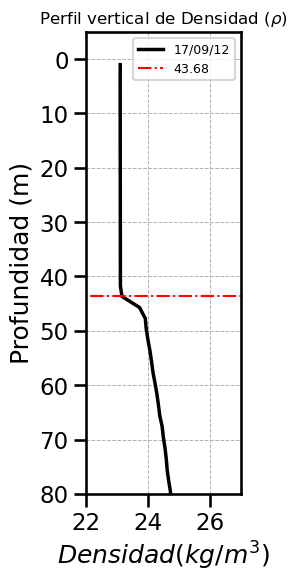

In [116]:
#Graficamos
n=26
import seaborn as sea
with sea.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(2,6))
    ax.plot(rho,z,color='k',linewidth=2.5,label=ds.JULD[num].dt.strftime('%y/%m/%d').values)
    # ax.plot(T,depth,'r',linewidth = 2.5)
    # ax.plot(rho[9],depth[9],'bo', label=depth[9].data)
    # ax.plot(rho[10],depth[10],'go', label=depth[10].data)
    # ax.plot(rho[10],depth[10],'g_',linewidth=1)
    # ax.plot(rho[61],z[61],'r_')
    # ax.plot(rho[45],z[45],'r_')
    ax.invert_yaxis()
    ax.grid(linestyle='--',linewidth=0.7)
    # ax.plot([rho[0]+0.125,rho[0]+0.125],[0,100],'g--',label=format(rho[0]+0.125,'.2f'),linewidth=2.5)
    # ax.plot([rho[9]+KML,rho[9]+KML],[0,100],'b-.',label=format(rho[9]+KML,'.2f'),linewidth=2.5)
    # ax.plot([rho[10]+0.01,rho[10]+0.01],[0,100],'r--',label=format(rho[10]+0.01,'.2f'),linewidth=2.5)
    ax.plot([20,37],[z[n],z[n]],'r-.',label=format(z[n],'.2f'),linewidth=1.5)
    ax.set_xlim(22,27)
    ax.set_ylim(80,-5)
    ax.legend(fontsize=9)
    
    ax.set_ylabel( 'Profundidad (m)')
    ax.set_xlabel(r'$Densidad(kg/m^3)$')
    ax.set_title(r'Perfil vertical de Densidad $(\rho)$',fontsize =12)